# Modules BEGINNER

Esta tabla contiene la información a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [54]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-26 11:23:57.742997 Data cache files found ...
2025-01-26 11:23:57.742997 Data cache files successfully loaded!!
The dataset contains 3915 (49.31%) instances for BEGINNER class and 4024 (50.69%) for PROFESSIONAL class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 BEGINNER CLASS Features shape: (3915, 13)
As we can see the downloaded data contains a total of 3915 instances of BEGINNER. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3915 entries, 4024 to 7938
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              3915 non-null   object 
 1   module__has_doc_string               3915 non-null   bool   
 2   module__global_stmts_pct             3915 non-null   float64
 3   module__global_expressions_pct       3915 non-null   float64
 4   module__number_of_classes            3915 non-null   int64  
 5   module__number_of_functions          3915 non-null   int64  
 6   module__class_defs_pct               3915 non-null   float64
 7   module__function_defs_pct            3915 non-null   float64
 8   module__enum_defs_pct                3915 non-null   float64
 9   module__average_stmts_function_body  3915 non-null   float64
 10  module__average_stmts_method_body    3915 non-null   float64
 11  module__type_annotations_pct    

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y una de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [5]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,3915,6,NoNameConvention,1216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,3915,2,False,3805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,3915.0,NaN,NaN,NaN,0.410562,0.346872,0.0,0.0,0.357143,0.7,1.0
module__global_expressions_pct,3915.0,NaN,NaN,NaN,0.160021,0.187473,0.0,0.0,0.1,0.285714,1.0
module__number_of_classes,3915.0,NaN,NaN,NaN,0.033716,0.438779,0.0,0.0,0.0,0.0,11.0
module__number_of_functions,3915.0,NaN,NaN,NaN,2.450319,4.644849,0.0,0.0,1.0,3.0,57.0
module__class_defs_pct,3915.0,NaN,NaN,NaN,0.009525,0.093798,0.0,0.0,0.0,0.0,1.0
module__function_defs_pct,3915.0,NaN,NaN,NaN,0.652033,0.475716,0.0,0.0,1.0,1.0,1.0
module__enum_defs_pct,3915.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
module__average_stmts_function_body,3915.0,NaN,NaN,NaN,3.563789,4.226061,0.0,0.0,3.0,5.0,43.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.0
    "module__number_of_classes": [(0, 0), (1, 1), (1,inf)],  # min: 0 max: 60
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 80
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 0.90
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, inf)], #min: 0.0 max: 43.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 28.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   3871   98.876117
             [1.0_1.0]     33    0.842912
             [0.0_1.0)     11    0.280971

module__function_defs_pct  count  percentage
                [1.0_1.0]   2546   65.031928
                [0.0_0.0]   1358   34.687101
                [0.0_1.0)     11    0.280971

module__enum_defs_pct  count  percentage
            [0.0_0.0]   3915       100.0

module__number_of_classes  count  percentage
                    [0_0]   3871   98.876117
                    [1_1]     25    0.638570
                  [1_inf]     19    0.485313

module__number_of_functions  count  percentage
                    [0_inf]   2557   65.312899
                      [0_0]   1358   34.687101

module__type_annotations_pct  count  percentage
                   [0.0_0.0]   3904   99.719029
                   [0.0_inf]     11    0.280971

module__average_stmts_function_body  count  percentage
                     

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (3915, 18)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

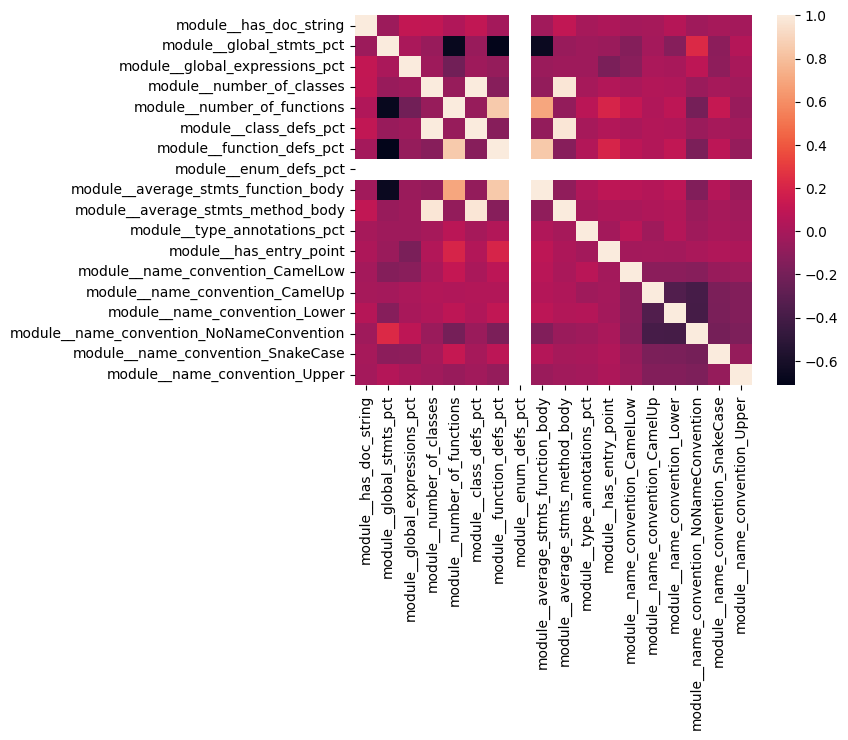

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

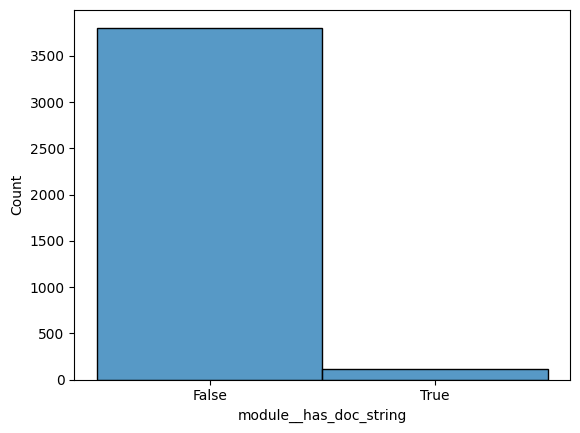

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [11]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 110 valores verdaderos y 3805 valores falsos. Y, la desviación típica es de 0.16527126729488373
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.0280970625798212.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.9719029374201787.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 97.19% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 2.81% de los items.


In [13]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,110.0,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.0,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.0,0.318142,0.247991,0.327273,4.145454,0.072727,0.618182,0.0,2.893484,0.439177,0.0,0.118182,0.018182,0.236364,0.409091,0.227273,0.072727,0.036364
std,0.0,0.306126,0.163054,1.368781,7.008300,0.260877,0.488056,0.0,3.105338,1.982452,0.0,0.324301,0.134220,0.426792,0.493916,0.420988,0.260877,0.188050
min,1.0,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.210526,0.200000,0.000000,1.500000,0.000000,1.000000,0.0,2.708333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.666667,0.333333,0.000000,5.000000,0.000000,1.000000,0.0,4.458333,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,0.928571,0.684211,7.000000,41.000000,1.000000,1.000000,0.0,19.000000,13.714286,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

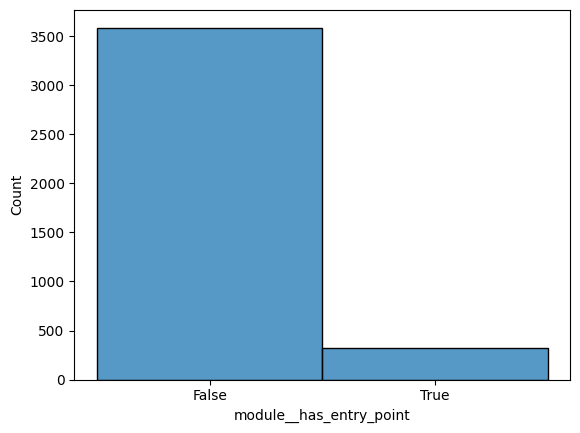

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 327 valores verdaderos y 3588 valores falsos. Y, la desviación típica es de 0.27670931816101074
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.08352490421455938.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.9164750957854406.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 91.65% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 8.352% de los items.


In [17]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.0,327.000000,327.000000,327.0,327.0,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.039755,0.315155,0.055774,0.085627,3.847095,0.016687,0.968023,0.0,4.403287,0.351209,0.0,1.0,0.024465,0.238532,0.235474,0.321101,0.110092,0.070336
std,0.195683,0.208874,0.107766,0.867976,4.797863,0.112370,0.164979,0.0,4.736190,2.628391,0.0,0.0,0.154724,0.426839,0.424945,0.467615,0.313484,0.256105
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.250000,0.000000,0.000000,2.000000,0.000000,1.000000,0.0,3.500000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.500000,0.090909,0.000000,4.000000,0.000000,1.000000,0.0,5.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.500000,11.000000,27.000000,1.000000,1.000000,0.0,41.000000,22.555555,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 11. Con una media de 0,0337.

<Axes: ylabel='module__number_of_classes'>

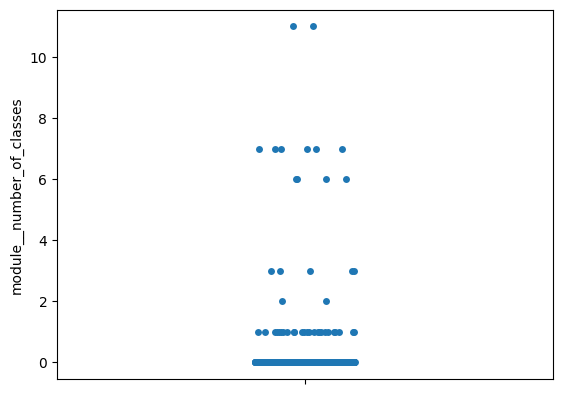

In [18]:
sns.stripplot(X['module__number_of_classes'])

In [19]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9600466089977846
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a 0.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a 0.0 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 44 instancias tienen un valor para module__number_of_classes superior a 0.0 (Q3+1.5*IQR) para module__number_of_classes. Representando un 1.124% del total de instancias.
+3.0IQR: 44 instancias tienen un valor para module__number_of_classes superior a 0.0 (Q3-3*IQR) para module__number_of_classes. Representando un 1.124% del total de instancias.
L: 0 instancias tienen un valor para module__number_of_clas

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Con un MC de 96 usamos U)

In [55]:
X[X['module__number_of_classes'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,0.181818,0.219041,0.076256,3.000000,1.318182,0.847497,0.152503,0.0,1.821970,5.628764,0.0,0.181818,0.045455,0.409091,0.409091,0.068182,0.068182,0.0
std,0.390154,0.281417,0.102819,2.901483,2.970966,0.272276,0.272276,0.0,5.286635,5.841182,0.0,0.390154,0.210707,0.497350,0.497350,0.254972,0.254972,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.875000,0.000000,0.0,0.000000,2.257143,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.037037,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,4.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.503049,0.166667,6.000000,0.250000,1.000000,0.125000,0.0,0.500000,4.666667,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,0.780822,0.292683,11.000000,12.000000,1.000000,0.833333,0.0,24.833334,22.555555,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 57. Con una media de 2.45.

<Axes: ylabel='module__number_of_functions'>

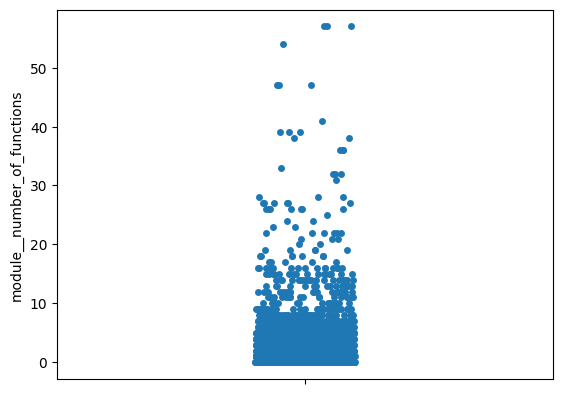

In [21]:
sns.stripplot(X['module__number_of_functions'])

In [22]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.82695135893826
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.2490124560409803,125.96291828107186]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 272 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 6.948% del total de instancias.
+3.0IQR: 136 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 3.474% del total de instancias.
L: 0 i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 12 (Con un MC de 82 usamos Tukey Extremo)

In [56]:
X[X['module__number_of_functions'] > 12].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,136.000000,136.000000,136.000000,136.0,136.000000,136.0,136.0,136.0,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.080882,0.120228,0.038133,0.0,21.411764,0.0,1.0,0.0,4.688749,0.0,0.002880,0.132353,0.088235,0.316176,0.382353,0.051471,0.125000,0.036765
std,0.273662,0.180626,0.114237,0.0,10.126219,0.0,0.0,0.0,1.596035,0.0,0.029410,0.340127,0.284685,0.466702,0.487759,0.221772,0.331942,0.188879
min,0.000000,0.000000,0.000000,0.0,13.000000,0.0,1.0,0.0,1.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,14.750000,0.0,1.0,0.0,3.854396,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.031250,0.000000,0.0,17.000000,0.0,1.0,0.0,4.481482,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.194444,0.000000,0.0,26.000000,0.0,1.0,0.0,5.555555,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,0.727941,0.517647,0.0,57.000000,0.0,1.0,0.0,9.466666,0.0,0.341463,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 43. Con una media de 3.563.

<Axes: ylabel='module__average_stmts_function_body'>

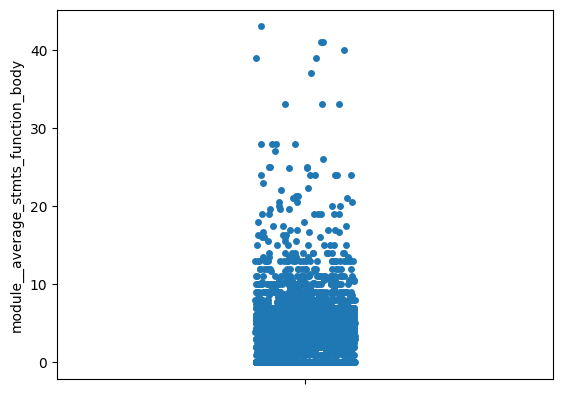

In [24]:
sns.stripplot(X['module__average_stmts_function_body'])

In [25]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6788581130060031
Rango valores atípicos extremos (Tukey): [-15.0,20.0]
Rango valores atípicos leves (Tukey): [-7.5,12.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.6969090427256769,118.33357627766742]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -15.0 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -7.5 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 129 instancias tienen un valor para module__average_stmts_function_body superior a 12.5 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 3.295% del total de instancias.
+3.0IQR: 37 instancias tienen un valor para module__average_stmts_function_body superior a 20.0 (Q3-3*IQR) para module__average_stmts_f

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 20 (Con un MC de 67 usamos Tuckey Extremo)

In [57]:
X[X['module__average_stmts_function_body'] > 20].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.0,0.098148,0.034256,0.594595,1.918919,0.025852,0.974148,0.0,27.729731,0.0,0.0,0.189189,0.081081,0.216216,0.351351,0.189189,0.081081,0.081081
std,0.0,0.172522,0.069277,2.521678,2.564484,0.109638,0.109638,0.0,6.874548,0.0,0.0,0.397061,0.276725,0.417342,0.483977,0.397061,0.276725,0.276725
min,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.521739,0.0,20.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,23.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,25.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.166667,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,33.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.0,0.500000,0.250000,11.000000,12.000000,0.478261,1.000000,0.0,43.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 22.55. Con una media de 0.063.

<Axes: ylabel='module__average_stmts_method_body'>

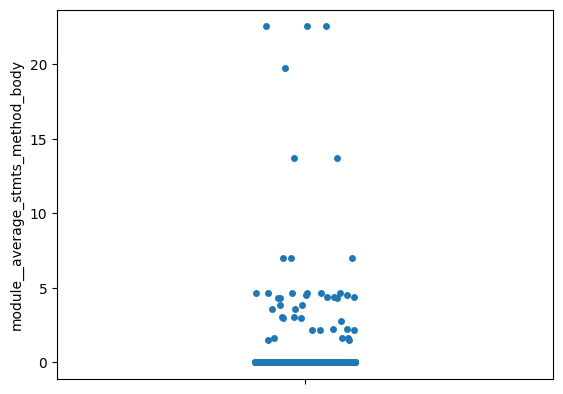

In [27]:
sns.stripplot(X['module__average_stmts_method_body'])

In [28]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9615011083952217
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a 0.0 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a 0.0 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 42 instancias tienen un valor para module__average_stmts_method_body superior a 0.0 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 1.073% del total de instancias.
+3.0IQR: 42 instancias tienen un valor para module__average_stmts_method_body superior a 0.0 (Q3-3*IQR) para module__average_stmts_method_body. Representando un 1.073% del total de instanc

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Con un MC de 96 usamos Tuckey Extremo)

In [58]:
X[X['module__average_stmts_method_body'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0
mean,0.190476,0.225944,0.079888,2.619048,0.809524,0.865079,0.134921,0.0,0.726190,5.896800,0.0,0.142857,0.047619,0.380952,0.428571,0.071429,0.071429,0.0
std,0.397437,0.286330,0.103876,2.357680,1.851013,0.266051,0.266051,0.0,1.500484,5.845055,0.0,0.354169,0.215540,0.491507,0.500870,0.260661,0.260661,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.166667,0.000000,0.0,0.000000,1.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.812500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,4.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.509146,0.166667,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,4.666667,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,0.780822,0.292683,7.000000,6.000000,1.000000,0.833333,0.0,4.666667,22.555555,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

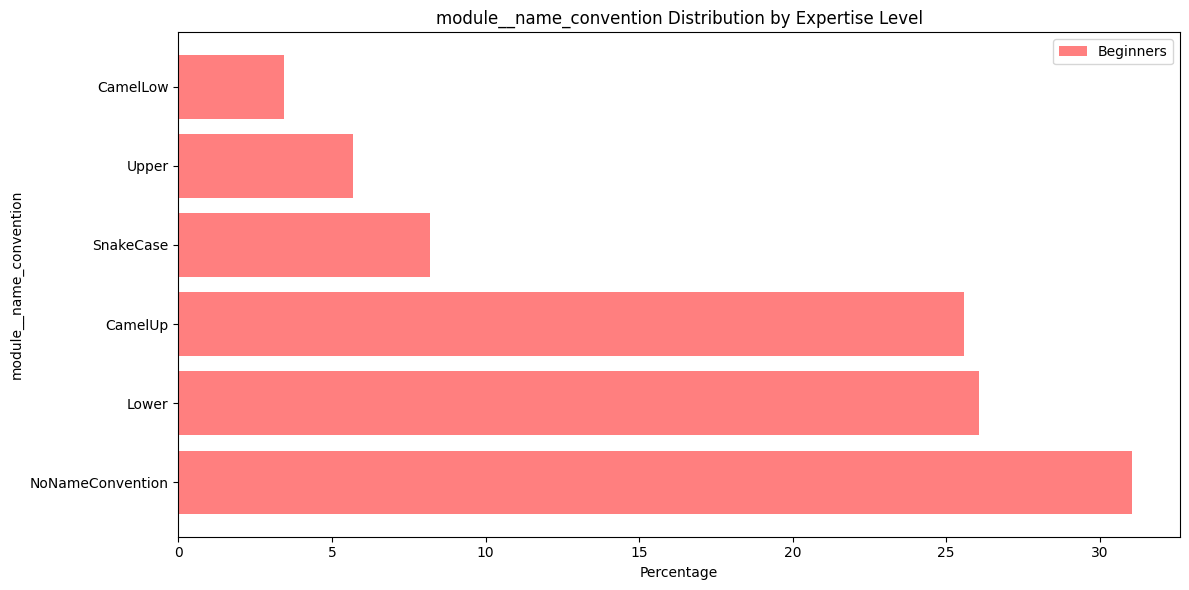

In [30]:
print_categorical_histogram(full_table, 'module__name_convention','module__expertise_level', include_all=False,include_experts=False)

In [31]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de NoNameConvention en un 31.06% de los items.
La variable module__name_convention toma el valor de Lower en un 26.08% de los items.
La variable module__name_convention toma el valor de CamelUp en un 25.57% de los items.
La variable module__name_convention toma el valor de SnakeCase en un 8.199% de los items.
La variable module__name_convention toma el valor de Upper en un 5.67% de los items.
La variable module__name_convention toma el valor de CamelLow en un 3.423% de los items.


In [32]:
print_values_usage_for_cat_var(full_table, 'module__name_convention', NAMING_CONVENTION_VALUES)

La variable module__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable module__name_convention nunca toma valor Discard.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.41.

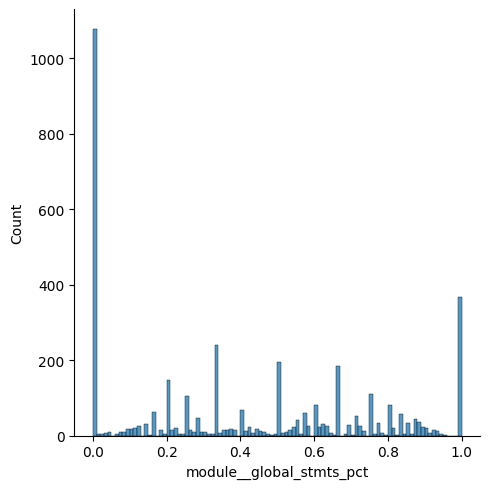

In [33]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5114240728194301
Rango valores atípicos extremos (Tukey): [-2.099999964237213,2.799999952316284]
Rango valores atípicos leves (Tukey): [-1.0499999821186066,1.7499999701976776]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17531093543700033,8.821269115307361]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -2.099999964237213 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.0499999821186066 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.7499999701976776 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 2.799999952316284 (Q3-3*IQR) 

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.


In [59]:
X[X['module__global_stmts_pct'] > 0 & X['module__global_stmts_pct'] < 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

TypeError: Cannot perform 'rand_' with a dtyped [float32] array and scalar of type [bool]

### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.16.

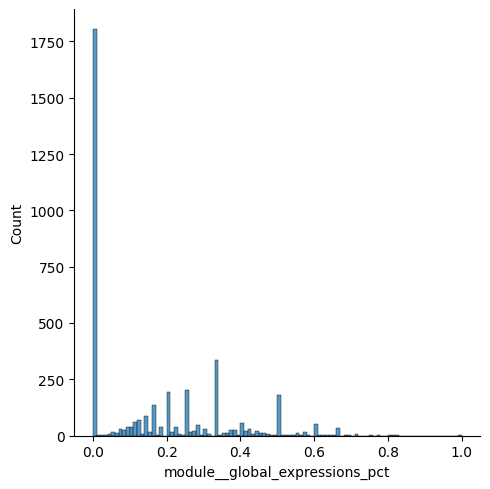

In [36]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [37]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6525053381919861
Rango valores atípicos extremos (Tukey): [-0.8571428954601288,1.1428571939468384]
Rango valores atípicos leves (Tukey): [-0.4285714477300644,0.714285746216774]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.04367119710408073,6.114003658592205]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.8571428954601288 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.4285714477300644 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 13 instancias tienen un valor para module__global_expressions_pct superior a 0.714285746216774 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 0.3321% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_expressio

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.71 (Con un MC de 65 usamos Tuckey)

In [60]:
X[X['module__global_expressions_pct'] > 0.71].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,21.0,21.000000,21.000000,21.0,21.000000,21.0,21.000000,21.0,21.000000,21.0,21.0,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.0,0.111276,0.791133,0.0,1.571429,0.0,0.523810,0.0,3.251701,0.0,0.0,0.0,0.095238,0.047619,0.238095,0.333333,0.190476,0.095238
std,0.0,0.100702,0.096366,0.0,2.461126,0.0,0.511766,0.0,4.193996,0.0,0.0,0.0,0.300793,0.218218,0.436436,0.483046,0.402374,0.300793
min,0.0,0.000000,0.714286,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.714286,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.090909,0.773810,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.142857,0.818182,0.0,1.000000,0.0,1.000000,0.0,5.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.0,0.285714,1.000000,0.0,7.000000,0.0,1.000000,0.0,15.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.0095. 

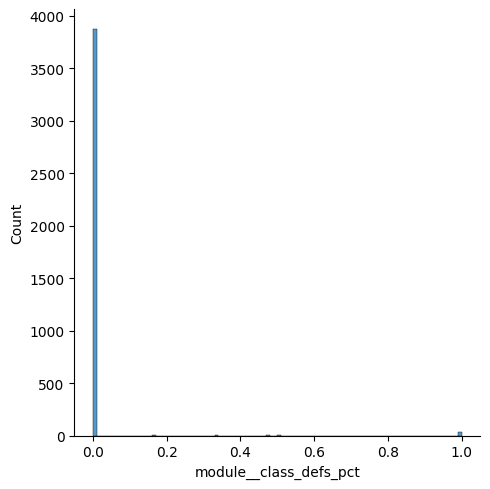

In [39]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9444642608364107
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 44 instancias tienen un valor para module__class_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 1.124% del total de instancias.
+3.0IQR: 44 instancias tienen un valor para module__class_defs_pct superior a 0.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 1.124% del total de instancias.
L: 0 instancias tienen un valor para module__class_defs_pct inferior a 0.0 para mod

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [61]:
X[X['module__class_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,0.181818,0.219041,0.076256,3.000000,1.318182,0.847497,0.152503,0.0,1.821970,5.628764,0.0,0.181818,0.045455,0.409091,0.409091,0.068182,0.068182,0.0
std,0.390154,0.281417,0.102819,2.901483,2.970966,0.272276,0.272276,0.0,5.286635,5.841182,0.0,0.390154,0.210707,0.497350,0.497350,0.254972,0.254972,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.875000,0.000000,0.0,0.000000,2.257143,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.037037,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,4.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.503049,0.166667,6.000000,0.250000,1.000000,0.125000,0.0,0.500000,4.666667,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,0.780822,0.292683,11.000000,12.000000,1.000000,0.833333,0.0,24.833334,22.555555,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.65

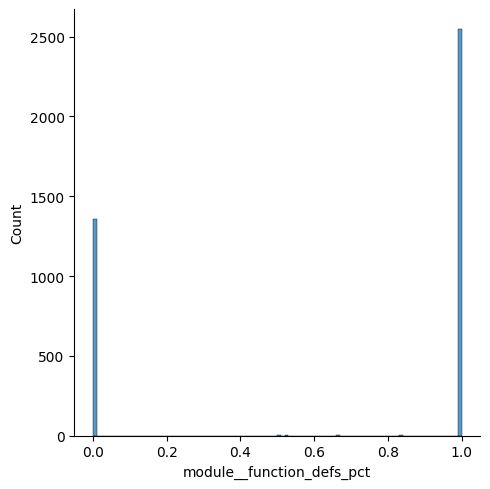

In [42]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [43]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.33630141409217246
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-5.758463953918461,1.4622775358972033]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un val

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [44]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0
mean,0.0,0.377987,0.068159,3.545455,5.272727,0.389987,0.610013,0.0,7.287879,7.814738,0.0,0.454545,0.181818,0.454545,0.090909,0.272727,0.0,0.0
std,0.0,0.305098,0.113680,3.777926,3.875330,0.108542,0.108542,0.0,8.738434,9.575130,0.0,0.522233,0.404520,0.522233,0.301511,0.467099,0.0,0.0
min,0.0,0.000000,0.000000,1.000000,1.000000,0.166667,0.500000,0.0,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.144180,0.000000,1.000000,2.500000,0.333333,0.510870,0.0,2.500000,2.181818,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.214286,0.000000,2.000000,5.000000,0.333333,0.666667,0.0,3.750000,2.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.646509,0.054795,3.000000,6.000000,0.489130,0.666667,0.0,4.666667,13.527778,0.0,1.000000,0.000000,1.000000,0.000000,0.500000,0.0,0.0
max,0.0,0.780822,0.292683,11.000000,12.000000,0.500000,0.833333,0.0,24.833334,22.555555,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 0.0. Su media es 0.0.

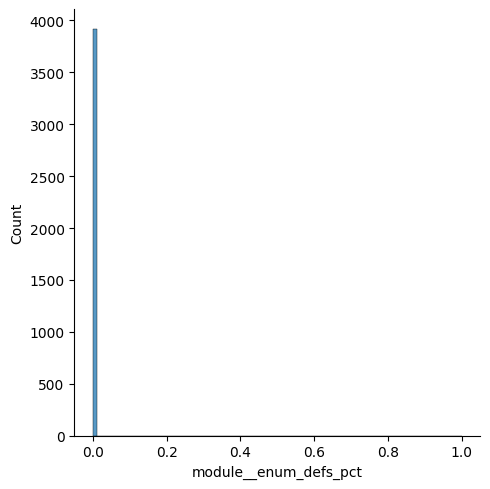

In [45]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__enum_defs_pct. Representa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [47]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 0.75. Su media es 0.001.

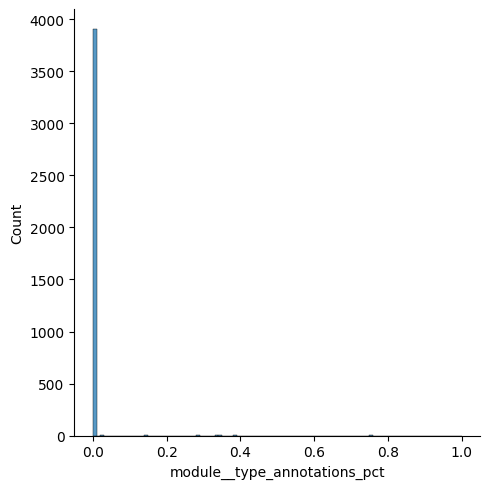

In [48]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9774488972276714
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 11 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 0.281% del total de instancias.
+3.0IQR: 11 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3-3*IQR) para module__type_annotations_pct. Representando un 0.281% del total de instancias.
L: 0 instancias tienen un valor par

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [50]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.0,11.0,11.000000,11.0,11.000000,11.0,11.000000,11.0,11.000000,11.0,11.000000,11.0
mean,0.0,0.147353,0.030303,0.0,13.000000,0.0,1.0,0.0,4.905950,0.0,0.375076,0.0,0.272727,0.0,0.636364,0.0,0.090909,0.0
std,0.0,0.142785,0.100504,0.0,14.324803,0.0,0.0,0.0,2.006713,0.0,0.270812,0.0,0.467099,0.0,0.504525,0.0,0.301511,0.0
min,0.0,0.000000,0.000000,0.0,1.000000,0.0,1.0,0.0,2.777778,0.0,0.020833,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.0,0.000000,0.000000,0.0,6.500000,0.0,1.0,0.0,2.787037,0.0,0.214286,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.0,0.142857,0.000000,0.0,9.000000,0.0,1.0,0.0,4.857143,0.0,0.333333,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0
75%,0.0,0.237179,0.000000,0.0,11.500000,0.0,1.0,0.0,6.538461,0.0,0.569444,0.0,0.500000,0.0,1.000000,0.0,0.000000,0.0
max,0.0,0.384615,0.333333,0.0,54.000000,0.0,1.0,0.0,8.200000,0.0,0.750000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE
El 87% de los modulos no tiene anotaciones de tipo.

## Multivariate

Isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
5311,Lower,True,0.090909,0.090909,1,0,1.0,0.0,0.0,0.0,13.714286,0.0,True,BEGINNER
5360,Lower,True,0.090909,0.090909,1,0,1.0,0.0,0.0,0.0,13.714286,0.0,True,BEGINNER


### IMPORTANTE
Analizar los 6 resultados obtenidos.

In [52]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,2.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
module__global_stmts_pct,2.0,0.090909,0.0,0.090909,0.090909,0.090909,0.090909,0.090909
module__global_expressions_pct,2.0,0.090909,0.0,0.090909,0.090909,0.090909,0.090909,0.090909
module__number_of_classes,2.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
module__number_of_functions,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__class_defs_pct,2.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
module__function_defs_pct,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__enum_defs_pct,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__average_stmts_function_body,2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__average_stmts_method_body,2.0,13.714286,0.0,13.714286,13.714286,13.714286,13.714286,13.714286


In [53]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,3913.0,0.027600,0.163846,0.0,0.0,0.000000,0.000000,1.000000
module__global_stmts_pct,3913.0,0.410725,0.346885,0.0,0.0,0.357143,0.700000,1.000000
module__global_expressions_pct,3913.0,0.160057,0.187515,0.0,0.0,0.100000,0.285714,1.000000
module__number_of_classes,3913.0,0.033223,0.438346,0.0,0.0,0.000000,0.000000,11.000000
module__number_of_functions,3913.0,2.451572,4.645706,0.0,0.0,1.000000,3.000000,57.000000
module__class_defs_pct,3913.0,0.009019,0.091108,0.0,0.0,0.000000,0.000000,1.000000
module__function_defs_pct,3913.0,0.652366,0.475609,0.0,0.0,1.000000,1.000000,1.000000
module__enum_defs_pct,3913.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
module__average_stmts_function_body,3913.0,3.565610,4.226372,0.0,0.0,3.000000,5.000000,43.000000
module__average_stmts_method_body,3913.0,0.056283,0.795023,0.0,0.0,0.000000,0.000000,22.555555
